# Auto encoder - neural network - unsupervised learning
# why not PCA - Autoencoder can cosider non linear images where as PCA is only linear two dimention array.

#1.Vanilla Autoencoder
#2.Multilayer
#3.Convolutional Autoencoder
#4.Regularised Autoencoder
#5.Variational Autoencoder

In [25]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Layer
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

In [26]:
#Load the data
(X_train,_),(X_test,_)=mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [27]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [5]:
X_train.shape

(60000, 28, 28, 1)

In [28]:
#Normalize data
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [29]:
X_train=X_train.reshape((len(X_train),np.prod(X_train.shape[1:])))
X_test=X_test.reshape((len(X_test),np.prod(X_test.shape[1:])))

In [30]:
X_train.shape

(60000, 784)

In [31]:
input_size=784
hidden_size=64
output_size=784

In [32]:
x=Input(shape=(input_size,))
h=Dense(hidden_size,activation='relu')(x)
r=Dense(output_size,activation='sigmoid')(h)

ae=Model(inputs=x,outputs=r)

In [33]:
ae.compile(optimizer='adam', loss='mse')

In [34]:
epochs = 25
batch_size = 128
history = ae.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/25
469/469 [==============================] - 3s 5ms/step - loss: 0.0445 - val_loss: 0.0226
Epoch 2/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0174 - val_loss: 0.0130
Epoch 3/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0110 - val_loss: 0.0087
Epoch 4/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 5/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0062 - val_loss: 0.0055
Epoch 6/25
469/469 [==============================] - 3s 5ms/step - loss: 0.0053 - val_loss: 0.0049
Epoch 7/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0049 - val_loss: 0.0046
Epoch 8/25
469/469 [==============================] - 3s 6ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 9/25
469/469 [==============================] - 2s 5ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 10/25
469/469 [==============================] - 2s 4ms/step - loss: 0.0043 - val_loss: 0.0041

In [37]:
decoded_imgs = ae.predict(X_test)

313/313 [==============================] - 1s 2ms/step


313/313 [==============================] - 1s 2ms/step


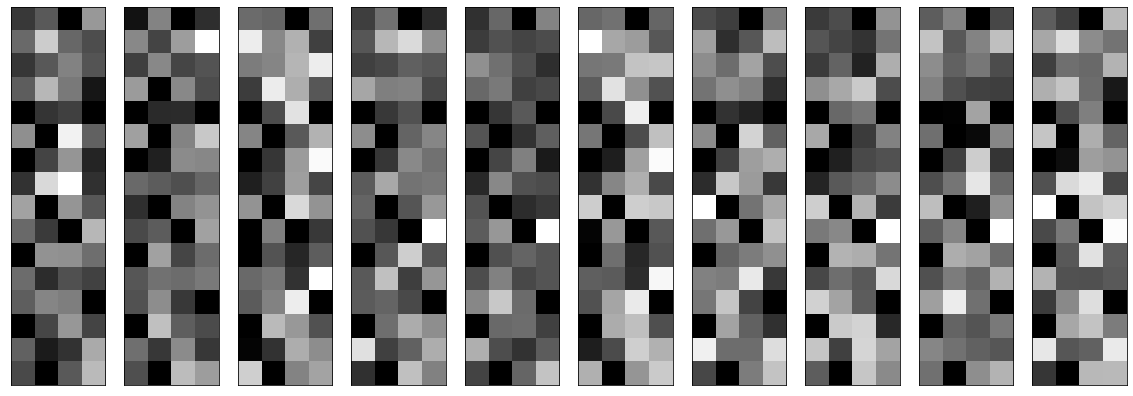

In [51]:
conv_encoder=Model(x,h)
encoded_imgs=conv_encoder.predict(X_test)
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4,16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
        
plt.show()

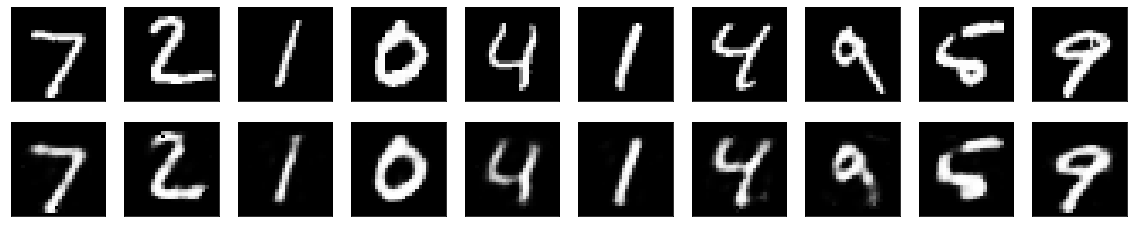

In [52]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [44]:
# Multilayer Autoencoder
input_size=784
hidden_size=128
code_size=64
# Encoder
x=Input(shape=(input_size,))
hidden_1=Dense(hidden_size,activation='relu')(x)
h=Dense(code_size,activation='relu')(hidden_1)
# Decoder
hidden_2=Dense(hidden_size,activation='relu')(h)
r=Dense(input_size,activation='sigmoid')(hidden_2)
ae1=Model(inputs=x,outputs=r)

In [45]:
ae1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


In [46]:
ae1.compile(optimizer='adam', loss='mse')

In [47]:
epochs=5
batch_size=128
history = ae1.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 5s 9ms/step - loss: 0.0422 - val_loss: 0.0201
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0164 - val_loss: 0.0131
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0121 - val_loss: 0.0106
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0103 - val_loss: 0.0093
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0092 - val_loss: 0.0085


In [49]:
ae1.evaluate(X_test,X_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0085


0.008498740382492542

In [50]:
decoded_imgs = ae1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [53]:
# Covolutional Autoencoder
nb_classes=10
# Load the data
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255


In [54]:
X_train.shape

(60000, 28, 28, 1)

In [55]:
y_train=np_utils.to_categorical(y_train,nb_classes)
y_test=np_utils.to_categorical(y_test,nb_classes)

In [73]:
#Create the network
x=Input(shape=(28,28,1))

# Encoder
conv1_1=Conv2D(16,(3,3),activation='relu',padding='same')(x)
pool1=MaxPooling2D((2,2),padding='same')(conv1_1)
conv1_2=Conv2D(8,(3,3),activation='relu',padding='same')(pool1)
pool2=MaxPooling2D((2,2),padding='same')(conv1_2)
conv1_3=Conv2D(8,(3,3),activation='relu',padding='same')(pool2)
h=MaxPooling2D((2,2),padding='same')(conv1_3)


# Decoder 
conv2_1=Conv2D(8,(3,3),activation='relu',padding='same')(h)
up1=UpSampling2D((2,2))(conv2_1)
conv2_2=Conv2D(8,(3,3),activation='relu',padding='same')(up1)
up2=UpSampling2D((2,2))(conv2_2)
conv2_3=Conv2D(16,(3,3),activation='relu')(up2)
up3=UpSampling2D((2,2))(conv2_3)
r=Conv2D(1,(3,3),activation='sigmoid',padding='same')(up3)
ae2=Model(inputs=x,outputs=r) 



In [74]:
ae2.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 7, 7, 8)           584

In [75]:
ae2.compile(optimizer='adadelta', loss='binary_crossentropy')

In [76]:
epochs=3
batch_size=128
history = ae2.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/3
469/469 [==============================] - 81s 170ms/step - loss: 0.6922 - val_loss: 0.6910
Epoch 2/3
469/469 [==============================] - 77s 164ms/step - loss: 0.6894 - val_loss: 0.6875
Epoch 3/3
469/469 [==============================] - 75s 161ms/step - loss: 0.6846 - val_loss: 0.6811


In [66]:
decoded_imgs = ae2.predict(X_test)

313/313 [==============================] - 4s 13ms/step


ValueError: cannot reshape array of size 900 into shape (28,28)

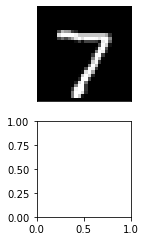

In [77]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()